In [1]:
# importing all the basic libraries

# using division module
import pandas as pd
import numpy as np

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('data/train.csv.xls')

In [3]:
# lets check the different neighborhoods
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [4]:
# total number of houses in the neighborhood
all_houses = len(df)
print('Total Number of Houses in the Old Town Road: ', all_houses)

Total Number of Houses in the Old Town Road:  1460


In [5]:
# total number of houses in the old town neighborhood
houses_in_OldTown = len(df[df['Neighborhood'] == 'OldTown'])
print('Total Number of Houses in the Old Town Road :', houses_in_OldTown)

Total Number of Houses in the Old Town Road : 113


In [6]:
# can use a piechart to show the result
# lets find the probability of picking a house in the OldTown
probability = (houses_in_OldTown / all_houses) * 100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability) + '%')

Probability of picking a house in OldTown: 7.74%


### Conditional Probability

**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood?**

In [7]:
# Enter conditional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1) / (all_houses - 1))
print('The Probability of Picking a house in Old Town and again picking a house from the same neighborhood is {0:.9f}'.format(cond_prob * 100))

The Probability of Picking a house in Old Town and again picking a house from the same neighborhood is 0.594139352


#### Checking for Skewness of the Data

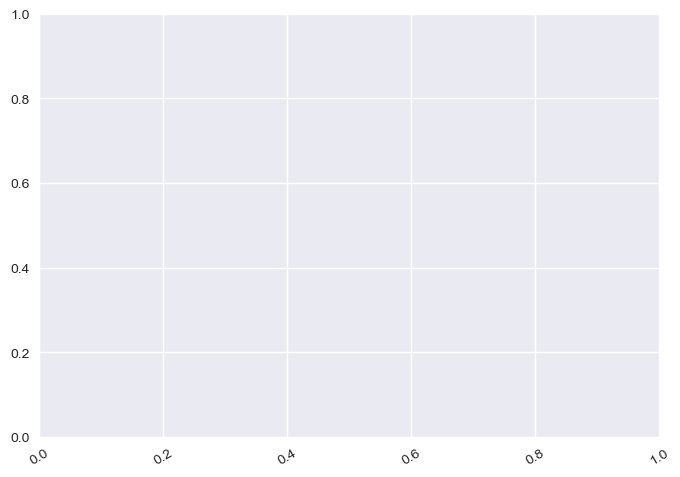

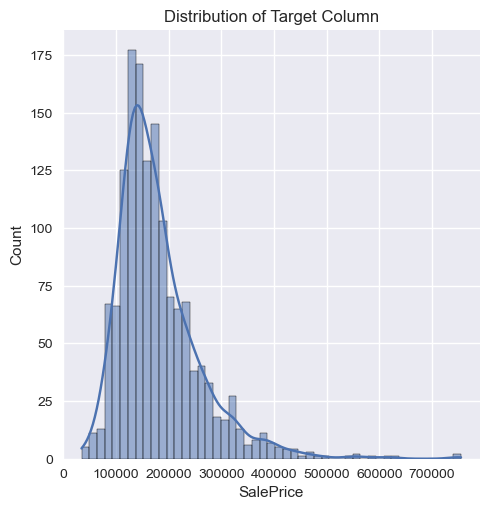

In [8]:
# plotting for skewness
plt.rcParams['figure.figsize'] = (6,4)
plt.style.use('seaborn')

plt.xticks(rotation=30)
sns.displot(df['SalePrice'], kde = True)
plt.title('Distribution of Target Column')
plt.show()

In [9]:
# computing the skewness for each column
df['SalePrice'].skew()

1.8828757597682129

### Z-Score

- The number of Standard Deviation from the mean is also called the _Standard Deviation_

### Inference

### For AB Testing

In [10]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(3)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a = df['SalePrice'], size = 300)

# getting the sample mean
print('Sample mean: ', sample_ages.mean())
print('Sample median: ', np.median(sample_ages))
print('Sample std: ', np.std(sample_ages))

# getting the population mean
print('Population mean: ', df['SalePrice'].mean())
print('Population median: ', df['SalePrice'].median())
print('Population std: ', df['SalePrice'].std())

Sample mean:  178084.37666666668
Sample median:  163500.0
Sample std:  70985.42606992032
Population mean:  180921.19589041095
Population median:  163000.0
Population std:  79442.50288288663


> From above information we can infer that the sample mean, median, and std are not far from the population. Hence...

### Confidence Interval

**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposes range.


In [11]:
# lets import the scipy package
import scipy.stats as stats
import math

In [12]:
# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 100
sample = np.random.choice(a = df['SalePrice'], size = sample_size)
sample_mean = sample.mean()

In [13]:
# get the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# check the z-critical value
print('z-critical value: ', z_critical)

z-critical value:  1.6448536269514722


In [14]:
# get the population standard deviation
pop_stdev = df['SalePrice'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

In [15]:
# lets print the results
print('Confidence interval: ', end = ' ')
print(confidence_interval)
print('True mean {}'.format(df['SalePrice'].mean()))

Confidence interval:  (169025.40109989812, 195159.65890010187)
True mean 180921.19589041095


### Hypothesis Testing

- _**Statistical Hypthesis**,_ A statistical hypothesis test is a method of statistical inference.

### P Value
- In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test result atleast as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

**Hypothesis: Are house prices in OldTown really different from the House Price of other Neighborhoods?**

In [16]:
import statsmodels.api as sm
import pylab

In [17]:
!pip install statsmodels

In [18]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

In [19]:
# getting z stats, p-value

old_town_sale_price = df[df['Neighborhood'] == 'OldTown']['SalePrice']
mean_values = df['SalePrice'].mean()
z_statistic, p_value = ztest(x1 = old_town_sale_price,
                             value = mean_values)

In [20]:
# lets print the Result
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.30f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.000000000000000000000000019561


- If the P-Value if less than 0.05, then we can reject our null hypothesis against the alternate hypothesis.
- **The Probability of getting the given distribution of houseprices in OldTown under the assumtion that its mean, is the same as the mean of all house prices.**

### Another way to test: Gosset's (Student's) t-test
- A t-test solves this probelm and gives us a way to do a hypothesis test on a smaller sample.
- Now, let's also see if house proces in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

#### Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

In [21]:
print('No of houses in Stone Brook: {}'\
     .format(df['Neighborhood'].value_counts()['StoneBr']))

No of houses in Stone Brook: 25


In [22]:
# getting stat values and pvalues
stats, p_val = stats.ttest_1samp(a = df[df['Neighborhood'] == 'StoneBr']['SalePrice'],  # sample 
                                popmean = df['SalePrice'].mean()) # populasi mean

In [23]:
# print stat val and p val
print('t_stat:', stats, 'p_val:', p_val)

t_stat: 5.735070151700397 p_val: 6.558704101036394e-06


In [24]:
# hypothesis result
if p_val < 0.05:
    print('Ho Rejected')
else:
    print('Ho Accepted')

Ho Rejected


The P-Value in this case again is low and we can reject our null hypothesis.

### Chi Square Test 

To certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis.

**A chi-squared goodness of fit tests wheter the distribution of sample categorical data matches an expected distribution.**


**Let's generate some fake demographic data for U.S and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:**

### Chi-Squared Goodness of fit Test

In [25]:
# generate data
national = pd.DataFrame(['white']*12000 + ['hispanic']*2000 +\
                        ['black']*3000 + ['asian']*6000 + ['other']*22000)

minnesota = pd.DataFrame(['white']*200 + ['hispanic']*540 + \
                        ['black']*430 + ['asian']*50 + ['other']*210)

In [26]:
# generate table
national_table = pd.crosstab(index = national[0], columns = 'count')
minnesota_table = pd.crosstab(index = minnesota[0], columns = 'count')

In [27]:
# print table
print('National')
print(national_table)
print(' ')
print('Minnesota')
print(minnesota_table)

National
col_0     count
0              
asian      6000
black      3000
hispanic   2000
other     22000
white     12000
 
Minnesota
col_0     count
0              
asian        50
black       430
hispanic    540
other       210
white       200


In [28]:
# calculate chi2
observed = minnesota_table
national_ratios = national_table/len(national) # get population ratios
expected = national_ratios * len(minnesota) # Get expected counts
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print('Chi-squared:', chi_squared_stat[0])

Chi-squared: 5278.709472345836


### Effect of LandCountour on SalePrice

This let's divide the SalePrice in three buckets - High, Medium, Low

In [29]:
import scipy.stats as sp

In [30]:
# function to compute chi2
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print('Frequency table')
    print('========================')
    print(freqtab)
    print('========================')
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print('ChiSquare test statistic: ', chi2)
    print('p-value: ', pval)

In [31]:
price = pd.qcut(df['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(df.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


- The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.

In [32]:
# use qqplot
import statsmodels.api as sm
import pylab

In [33]:
# create function to plot the quantile
def create_qqplot(data, title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

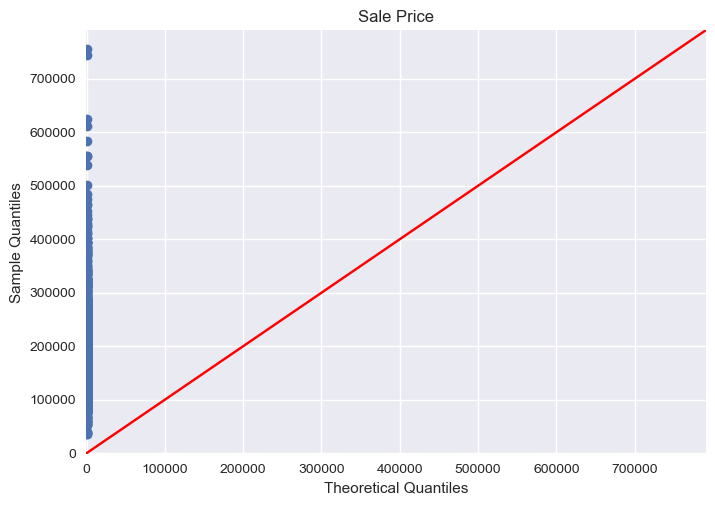

In [34]:
# create qq plot
create_qqplot(df['SalePrice'], 'Sale Price')

In [35]:
# use the Normality Test
from scipy.stats import shapiro, normaltest, anderson

In [36]:
# function to test normality
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])},
             'Shapiro' : shapiro(data)[1],
             'K^2' : normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
                

In [37]:
# check using anderson
try_normal(df['SalePrice'])

{'Anderson': {15.0: 0.574,
  10.0: 0.654,
  5.0: 0.785,
  2.5: 0.916,
  1.0: 1.089,
  'stat': 41.69199630641583},
 'Shapiro': 3.2072044604461286e-33,
 'K^2': 2.283848353787728e-133}

#### Anderson stat < critical value for accepting H0 (fail to reject H0) then data is normal distributed (or the designed dist)
#### Anderson stat > critical value for rejectiong H- (Accept H1) then data is not normal distributed (or the designed dist)

### References

1. https://datatab.net/tutorial/descriptive-inferential-statistics
2. https://www.scribbr.com/statistics/inferential-statistics/
3. https://www.questionpro.com/blog/inferential-statistics/
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
5. https://builtin.com/data-science/z-test-statistics